<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,33.534685,35.550102,61.016120,81.014969,-0.259334,220.856542,221.183427,-0.326885
1,0.0,1.0,21.891536,76.049354,68.433072,78.728756,-0.500202,254.602516,255.226761,-0.624244
2,0.0,2.0,45.201873,45.038495,57.661316,96.653317,0.888042,255.443043,254.727561,0.715482
3,0.0,3.0,92.803261,23.194772,94.559772,27.744309,0.370774,248.672888,247.936036,0.736852
4,0.0,4.0,50.990311,80.222877,81.085872,53.512447,1.001734,276.813242,275.756168,1.057074
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,36.821336,90.663398,43.193473,48.812985,0.999123,230.490315,229.643831,0.846484
119996,999.0,116.0,94.292050,76.230123,83.442564,21.451316,1.229556,286.645610,286.048339,0.597271
119997,999.0,117.0,33.854030,78.575915,48.419378,91.990020,-0.931314,261.908029,262.705874,-0.797845
119998,999.0,118.0,37.146100,70.333328,82.241182,56.932784,0.274772,256.928166,256.640864,0.287302


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    33.534685  35.550102  61.016120  81.014969 -0.259334  220.856542   
      1.0    21.891536  76.049354  68.433072  78.728756 -0.500202  254.602516   
      2.0    45.201873  45.038495  57.661316  96.653317  0.888042  255.443043   
      3.0    92.803261  23.194772  94.559772  27.744309  0.370774  248.672888   
      4.0    50.990311  80.222877  81.085872  53.512447  1.001734  276.813242   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  36.821336  90.663398  43.193473  48.812985  0.999123  230.490315   
      116.0  94.292050  76.230123  83.442564  21.451316  1.229556  286.645610   
      117.0  33.854030  78.575915  48.419378  91.990020 -0.931314  261.908029   
      118.0  37.146100  70.333328  82.241182  56.932784  0.274772  256.928166   
      119.0  46.999896  71.517946  37.885810  26.122316 -0.113078  192.412889   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    221.183427 -0.326885  
      1.0    255.226761 -0.624244  
      2.0    254.727561  0.715482  
      3.0    247.936036  0.736852  
      4.0    275.756168  1.057074  
...                 ...       ...  
999.0 115.0  229.643831  0.846484  
      116.0  286.048339  0.597271  
      117.0  262.705874 -0.797845  
      118.0  256.640864  0.287302  
      119.0  192.744155 -0.331266  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    33.534685  35.550102  61.016120  81.014969 -0.259334  220.856542   
      1.0    21.891536  76.049354  68.433072  78.728756 -0.500202  254.602516   
      2.0    45.201873  45.038495  57.661316  96.653317  0.888042  255.443043   
      3.0    92.803261  23.194772  94.559772  27.744309  0.370774  248.672888   
      4.0    50.990311  80.222877  81.085872  53.512447  1.001734  276.813242   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  36.821336  90.663398  43.193473  48.812985  0.999123  230.490315   
      116.0  94.292050  76.230123  83.442564  21.451316  1.229556  286.645610   
      117.0  33.854030  78.575915  48.419378  91.990020 -0.931314  261.908029   
      118.0  37.146100  70.333328  82.241182  56.932784  0.274772  256.928166   
      119.0  46.999896  71.517946  37.885810  26.122316 -0.113078  192.412889   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    221.183427 -0.326885  
      1.0    255.226761 -0.624244  
      2.0    254.727561  0.715482  
      3.0    247.936036  0.736852  
      4.0    275.756168  1.057074  
...                 ...       ...  
999.0 115.0  229.643831  0.846484  
      116.0  286.048339  0.597271  
      117.0  262.705874 -0.797845  
      118.0  256.640864  0.287302  
      119.0  192.744155 -0.331266  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,33.534685,35.550102,61.016120,81.014969,-0.259334,220.856542,221.183427,-0.326885
1,0.0,1.0,21.891536,76.049354,68.433072,78.728756,-0.500202,254.602516,255.226761,-0.624244
2,0.0,2.0,45.201873,45.038495,57.661316,96.653317,0.888042,255.443043,254.727561,0.715482
3,0.0,3.0,92.803261,23.194772,94.559772,27.744309,0.370774,248.672888,247.936036,0.736852
4,0.0,4.0,50.990311,80.222877,81.085872,53.512447,1.001734,276.813242,275.756168,1.057074
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,36.821336,90.663398,43.193473,48.812985,0.999123,230.490315,229.643831,0.846484
119996,999.0,116.0,94.292050,76.230123,83.442564,21.451316,1.229556,286.645610,286.048339,0.597271
119997,999.0,117.0,33.854030,78.575915,48.419378,91.990020,-0.931314,261.908029,262.705874,-0.797845
119998,999.0,118.0,37.146100,70.333328,82.241182,56.932784,0.274772,256.928166,256.640864,0.287302


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    33.534685  35.550102  61.016120  81.014969 -0.259334  220.856542   
      1.0    21.891536  76.049354  68.433072  78.728756 -0.500202  254.602516   
      2.0    45.201873  45.038495  57.661316  96.653317  0.888042  255.443043   
      3.0    92.803261  23.194772  94.559772  27.744309  0.370774  248.672888   
      4.0    50.990311  80.222877  81.085872  53.512447  1.001734  276.813242   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  36.821336  90.663398  43.193473  48.812985  0.999123  230.490315   
      116.0  94.292050  76.230123  83.442564  21.451316  1.229556  286.645610   
      117.0  33.854030  78.575915  48.419378  91.990020 -0.931314  261.908029   
      118.0  37.146100  70.333328  82.241182  56.932784  0.274772  256.928166   
      119.0  46.999896  71.517946  37.885810  26.122316 -0.113078  192.412889   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    221.183427 -0.326885  
      1.0    255.226761 -0.624244  
      2.0    254.727561  0.715482  
      3.0    247.936036  0.736852  
      4.0    275.756168  1.057074  
...                 ...       ...  
999.0 115.0  229.643831  0.846484  
      116.0  286.048339  0.597271  
      117.0  262.705874 -0.797845  
      118.0  256.640864  0.287302  
      119.0  192.744155 -0.331266  

[120000 rows x 8 columns]

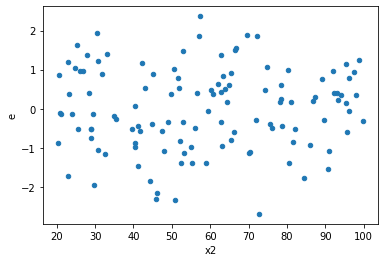

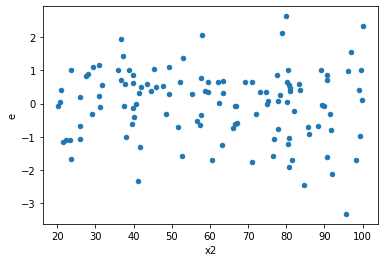

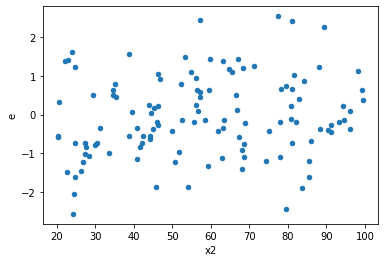

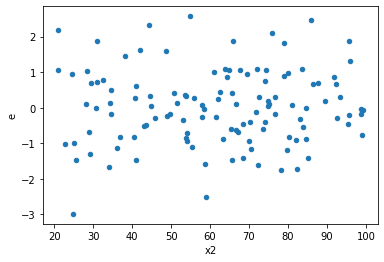

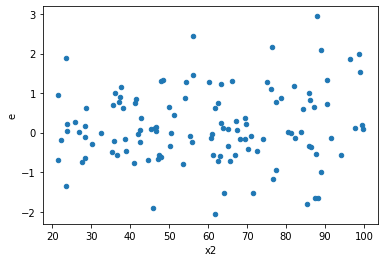

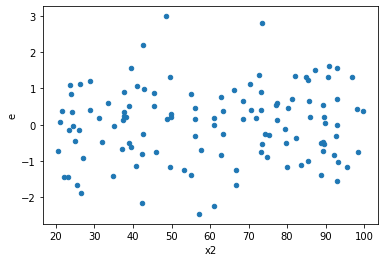

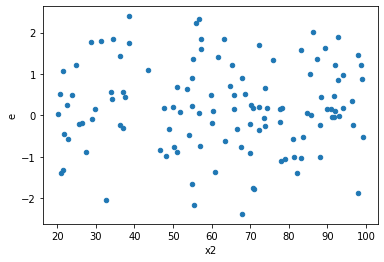

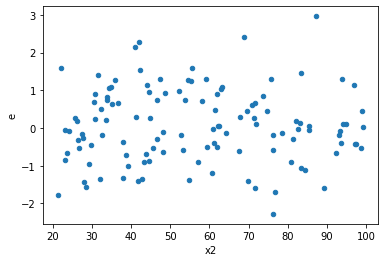

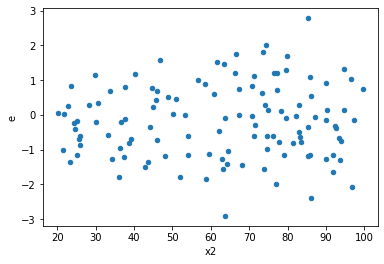

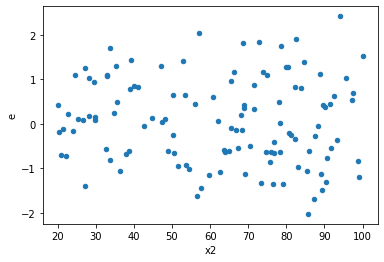

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,66.0,46.0,71.61685052186665,52.18043223084206,1.0851037957858585,1.13435722240961,1.0453905209944279,0.8837209391318306,0.5581395304340847,0.4418604695659153,Reject001=1 : Homoscedasticity
10.0,57.0,55.0,36.09326552618016,53.82468301358828,0.6332151846698274,0.9786306002470596,1.545494523725516,0.10708598850989115,0.9464570057450544,0.053542994254945575,Reject001=1 : Homoscedasticity
11.0,58.0,54.0,79.6392032530051,78.1135529180977,1.3730897112587088,1.4465472762610685,1.0534980084695422,0.8487257279974265,0.5756371360012867,0.42436286399871326,Reject001=1 : Homoscedasticity
12.0,45.0,67.0,51.84696883423323,80.28758169254861,1.1521548629829608,1.1983221148141585,1.0400703527923925,0.8716514051082593,0.5641742974458703,0.43582570255412967,Reject001=1 : Homoscedasticity
15.0,62.0,50.0,53.264320249545364,44.61436898568005,0.8591019395087962,0.8922873797136011,1.0386280587653882,0.8960606676362475,0.5519696661818763,0.44803033381812374,Reject001=1 : Homoscedasticity
16.0,51.0,61.0,48.87089337332474,63.92955155308513,0.9582528112416616,1.0480254352964775,1.0936836532088985,0.7333779115055257,0.6333110442472372,0.36668895575276284,Reject001=1 : Homoscedasticity
20.0,62.0,50.0,67.12891664064797,66.38221351307108,1.082724461945935,1.3276442702614215,1.2262069593175187,0.45794369428974857,0.7710281528551257,0.22897184714487429,Reject001=1 : Homoscedasticity
23.0,54.0,58.0,40.645861927063464,73.68322408686183,0.7527011467974716,1.2704004152907211,1.687788600689546,0.05156652531849315,0.9742167373407534,0.025783262659246575,Reject001=1 : Homoscedasticity
28.0,64.0,48.0,54.457747651198794,41.79573976892294,0.8509023070499812,0.8707445785192279,1.0233190946890702,0.942568660678496,0.528715669660752,0.471284330339248,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,72.0,40.0,90.02922503952135,34.201460448947124,1.2504059033266854,0.8550365112236781,0.6838071612976768,0.16027097627287107,Reject001=1 : Homoscedasticity
1.0,66.0,46.0,71.61685052186665,52.18043223084206,1.0851037957858585,1.13435722240961,1.0453905209944279,0.8837209391318306,Reject001=1 : Homoscedasticity
2.0,59.0,53.0,71.58217966541109,48.55254303763287,1.2132572824645946,0.9160857176911863,0.7550630282064016,0.29337649551840445,Reject001=1 : Homoscedasticity
3.0,71.0,41.0,83.97513588522627,39.387645026833034,1.1827483927496658,0.9606742689471471,0.812238913057207,0.4369196061863465,Reject001=1 : Homoscedasticity
4.0,59.0,53.0,57.703228705948774,40.77109736445705,0.9780208255245555,0.7692659880086236,0.7865537910156795,0.3688143172199824,Reject001=1 : Homoscedasticity
5.0,48.0,64.0,50.11098439691104,64.85876002018689,1.0439788416023135,1.0134181253154202,0.9707266899777507,0.9230764974783547,Reject001=1 : Homoscedasticity
6.0,42.0,70.0,47.26701877905406,69.86865399540916,1.1254052090250968,0.9981236285058451,0.8869015537705643,0.6836468703287231,Reject001=1 : Homoscedasticity
7.0,65.0,47.0,61.15109557323826,41.011872378792404,0.9407860857421271,0.8725930293360086,0.9275148118795514,0.7705119966818494,Reject001=1 : Homoscedasticity
8.0,59.0,53.0,68.2426114194408,53.12905454373793,1.1566544308379798,1.0024349913912818,0.8666676620648328,0.59090702410369,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      982
Reject001=0 : Heteroscedasticity     18
Name: Result_test, dtype: int64